Red Wine Quality Prediction

In [42]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


EDA

In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()  #no missing data found

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# acceptable range is -0.5 to +0.5
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We can see that few of them are outside the acceptable range

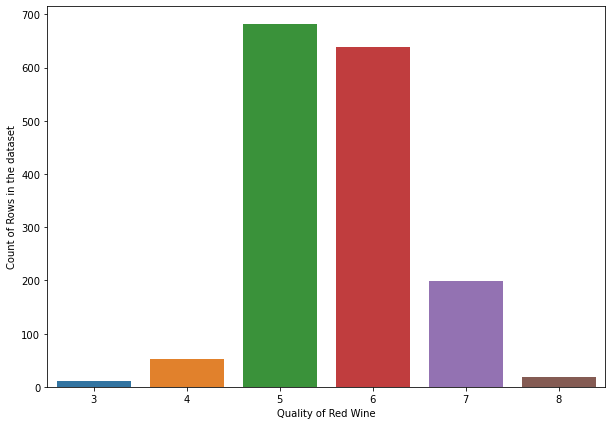

In [12]:
#Visualization

plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

There is an imbalance after looking from the above graph and it needs to be rectified

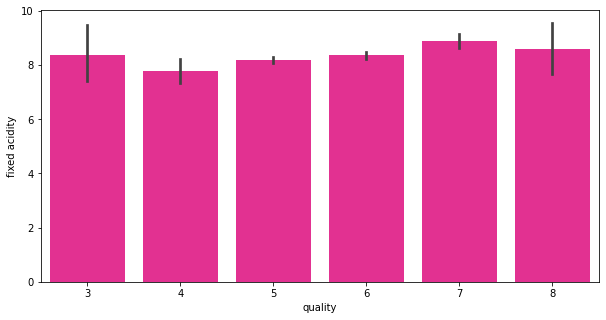

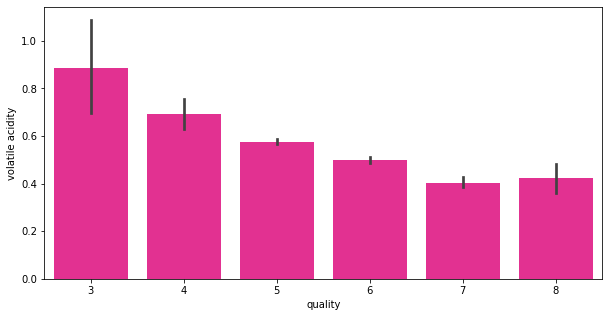

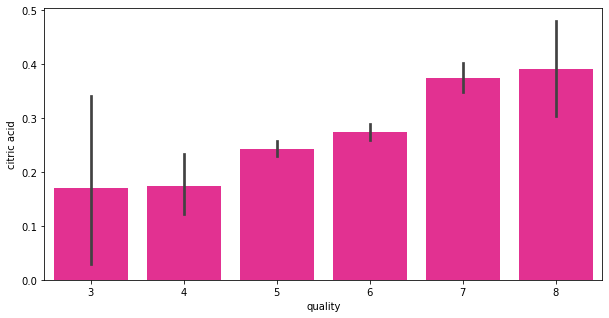

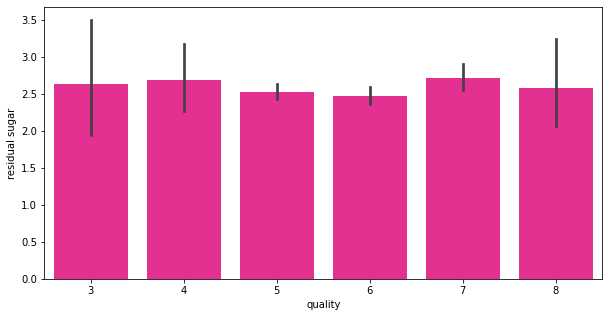

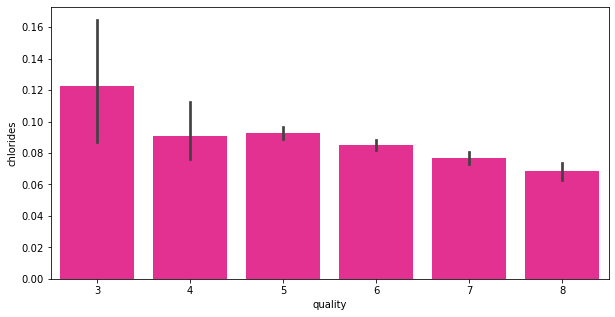

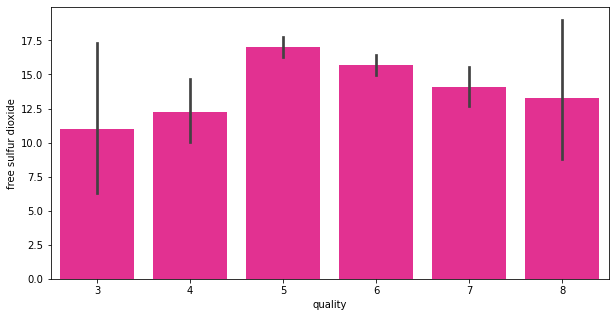

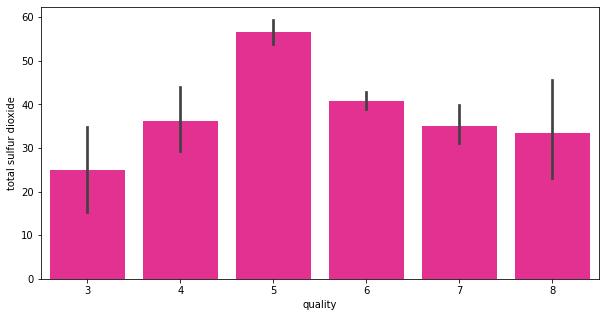

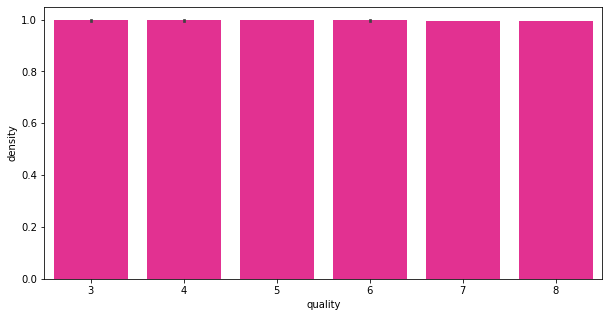

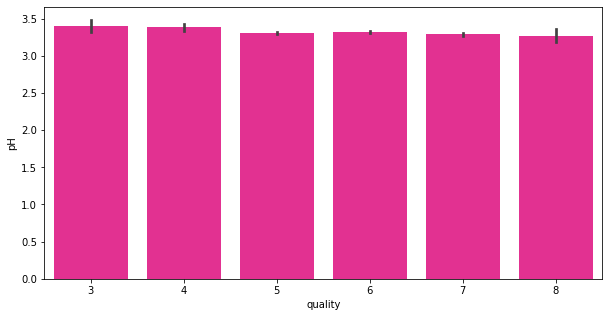

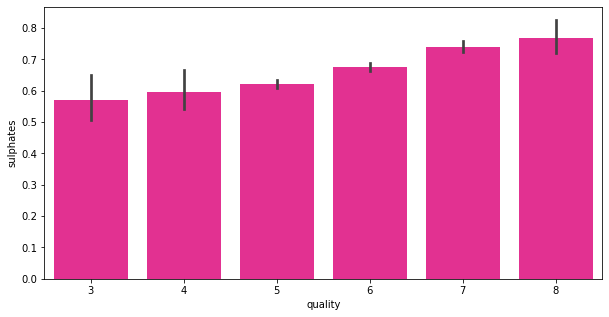

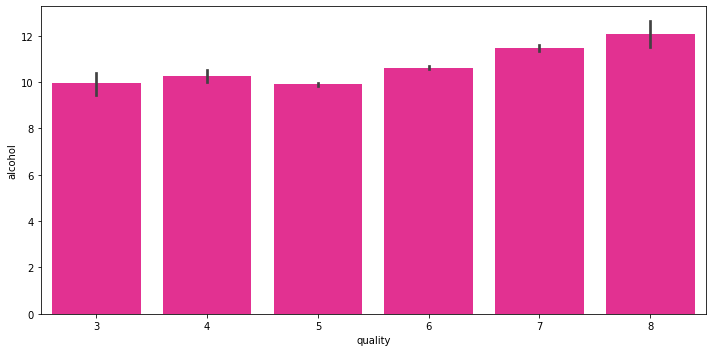

In [13]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

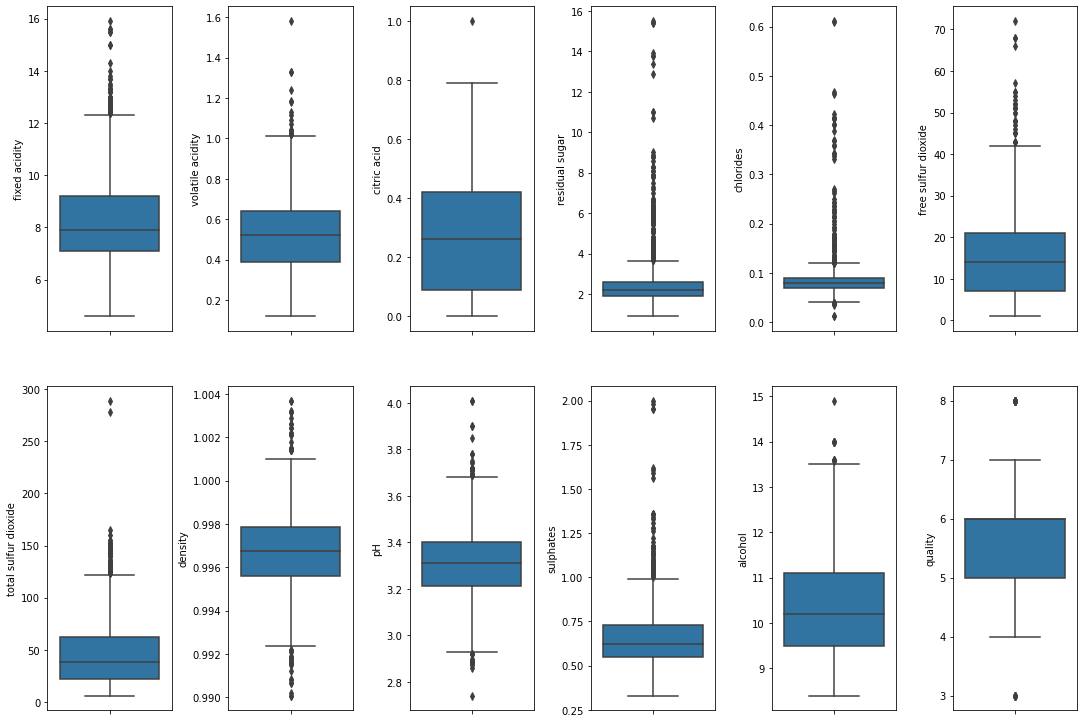

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

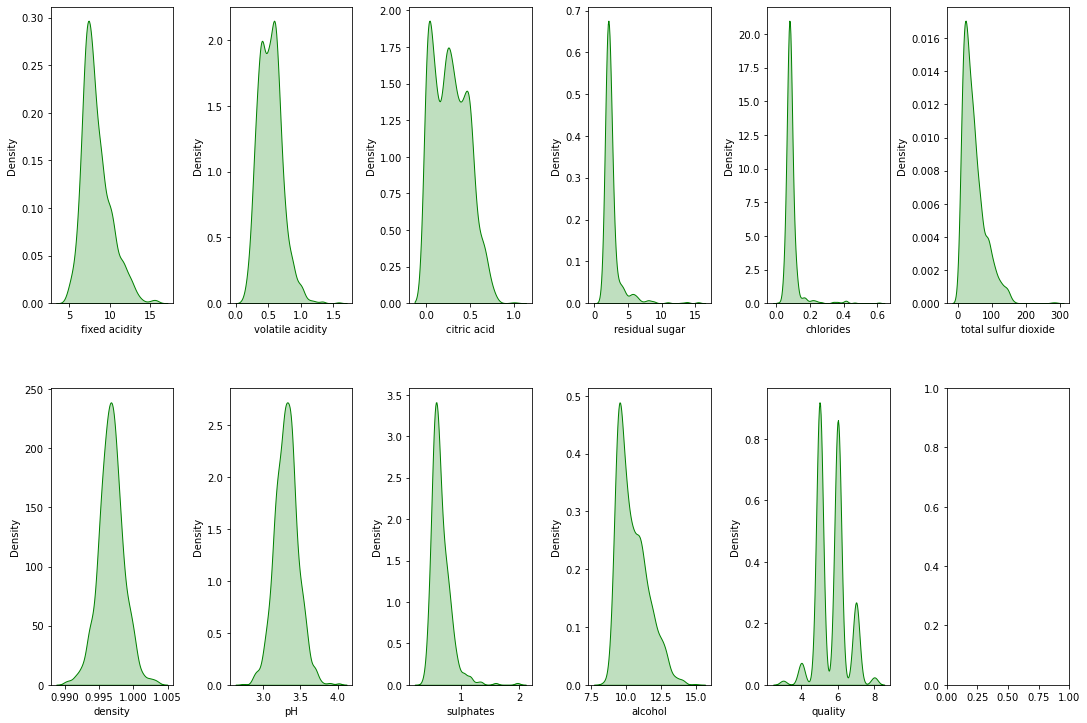

In [21]:

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Correlation using HeatMap

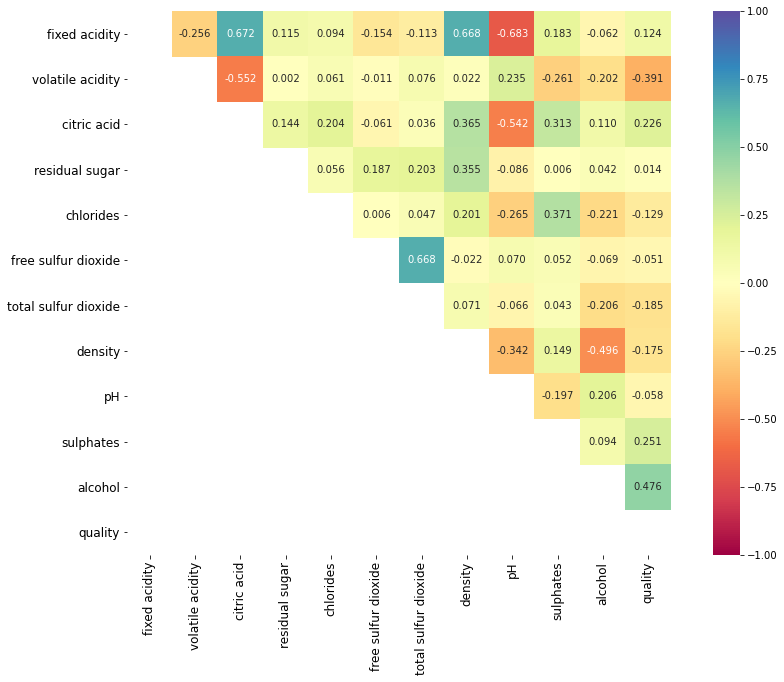

In [17]:
import numpy as np
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
df.shape

(1599, 11)

In [22]:
# z score model

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df.shape

(1464, 11)

Removed the one's which are outside the acceptable range

In [24]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

In [25]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [26]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [32]:
# Feature Scaling

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.550028,1.050174,-1.386158,-0.568896,-0.261878,-0.341258,0.636288,1.373350,-0.636986,-0.999199
1,-0.306973,2.117255,-1.386158,0.236748,0.775968,0.769792,0.053575,-0.824088,0.284883,-0.607676
2,-0.306973,1.405868,-1.176549,-0.108528,0.492919,0.332105,0.170117,-0.398777,0.054416,-0.607676
3,1.758994,-1.439680,1.548377,-0.568896,-0.309053,0.534115,0.752831,-1.107628,-0.483341,-0.607676
4,-0.550028,1.050174,-1.386158,-0.568896,-0.261878,-0.341258,0.636288,1.373350,-0.636986,-0.999199
...,...,...,...,...,...,...,...,...,...,...
1459,-1.279193,0.457352,-0.966939,-0.453804,0.398569,-0.004576,-1.053581,0.948040,-0.483341,0.077489
1460,-1.461484,0.160941,-0.862134,-0.223620,-0.922326,0.231101,-0.925384,1.444235,0.899463,0.762654
1461,-1.218429,-0.076188,-0.704927,-0.108528,-0.261878,-0.139249,-0.564102,0.735384,0.822641,0.566893
1462,-1.461484,0.724122,-0.757329,-0.453804,-0.309053,-0.004576,-0.721434,1.798661,0.515351,-0.216153


In [33]:
# Training and testing data sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [43]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [45]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 59.72696245733788

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.69      0.70      0.70       134
           6       0.52      0.63      0.57       107
           7       0.52      0.37      0.43        38
           8       0.00      0.00      0.00         4

    accuracy                           0.60       293
   macro avg       0.35      0.34      0.34       293
weighted avg       0.57      0.60      0.58       293

Cross Validation Score: 58.95016129786339

Accuracy Score - Cross Validation Score is 0.7768011594744948


In [46]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 61.092150170648466

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.69      0.71      0.70       134
           6       0.53      0.65      0.58       107
           7       0.61      0.37      0.46        38
           8       0.00      0.00      0.00         4

    accuracy                           0.61       293
   macro avg       0.37      0.35      0.35       293
weighted avg       0.59      0.61      0.59       293

Cross Validation Score: 60.042077703492446

Accuracy Score - Cross Validation Score is 1.0500724671560207


In [47]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 57.33788395904437

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.67      0.69      0.68       134
           6       0.51      0.52      0.52       107
           7       0.53      0.50      0.51        38
           8       0.00      0.00      0.00         4

    accuracy                           0.57       293
   macro avg       0.34      0.34      0.34       293
weighted avg       0.56      0.57      0.57       293

Cross Validation Score: 47.541025760905136

Accuracy Score - Cross Validation Score is 9.796858198139233


In [48]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 67.57679180887372

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.74      0.79      0.77       134
           6       0.62      0.65      0.64       107
           7       0.59      0.58      0.59        38
           8       0.00      0.00      0.00         4

    accuracy                           0.68       293
   macro avg       0.39      0.40      0.40       293
weighted avg       0.64      0.68      0.66       293

Cross Validation Score: 57.99429613352658

Accuracy Score - Cross Validation Score is 9.58249567534714


In [49]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 58.02047781569966

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.70      0.66      0.68       134
           6       0.50      0.61      0.55       107
           7       0.45      0.45      0.45        38
           8       0.00      0.00      0.00         4

    accuracy                           0.58       293
   macro avg       0.33      0.34      0.34       293
weighted avg       0.56      0.58      0.57       293

Cross Validation Score: 56.48721305343868

Accuracy Score - Cross Validation Score is 1.533264762260977


In [51]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 67.91808873720136

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.76      0.78      0.77       134
           6       0.61      0.72      0.66       107
           7       0.64      0.47      0.55        38
           8       0.00      0.00      0.00         4

    accuracy                           0.68       293
   macro avg       0.40      0.39      0.39       293
weighted avg       0.65      0.68      0.66       293

Cross Validation Score: 57.03959979428678

Accuracy Score - Cross Validation Score is 10.87848894291458
